### Fundamentals

What is machine learning?
> I hope you watched Scooby-do growing up.

![title](images/sd.jpeg)

### A non-exhaustive list of mathematical disciplines that you need to start mastering for Machine Learning.   
    1. Calculus (curve, equations, linear/non-linear functions, limits, differentials etc.)
    2. Linear Algebra (vector, matrix, linear transformations, transpose and inverse, eigen values, eigen vectors etc.)
    3. Probabilities (distributions, central tendency, probability moments, Bayes theorem, joint, marginal and conditional probability etc.)

#### Free resources that I highly recommend:
    1. 3Blue1Brown (https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw)
    2. MIT (https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw)
    3. Fast AI (https://www.fast.ai/)
    4. Khan Academy (https://www.khanacademy.org/)
    5. Kaggle Micro Courses (https://www.kaggle.com/learn/overview)
    6. Scikit learn documentation (https://scikit-learn.org/stable/)
    7. Coursera and Udacity (free if you audit)
    8. Free books (https://www.dataquest.io/blog/free-books-learn-data-science/)

#### Remember that portfolio is more important than certification when it comes to data science (and computer science in general). Why? Let's talk.

Listen to this podcast: http://ocdevel.com/mlg/6

### Classification
You are familiar with this type of problems now. In the last class, we looked into regression.

In [1]:
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
import numpy as np

C:\Users\ayush.LAPTOP-A9620OED\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### British College Admission Criteria (Mock Dataset)

In [2]:
# Ignore this I am just creating a fake dataset

def accepted(x, y):
    if (x+y)/2+random.randrange(-10, 10)>60:
        return 1
    return 0

d = {'bachelors_percentage': [random.randrange(20, 100) for x in range(50)], 'entrance_exam': [random.randrange(20, 100) for x in range(50)]}
df = pd.DataFrame(data=d)
df['accepted'] = df.apply(lambda x: accepted(x['bachelors_percentage'], x['entrance_exam']), axis=1)

In [3]:
df.sample(10)

,bachelors_percentage,entrance_exam,accepted
24,56,83,1
2,57,79,1
27,98,20,0
38,81,31,1
15,36,96,0
47,84,93,1
31,51,79,1
11,71,25,0
21,61,78,1
17,62,24,0


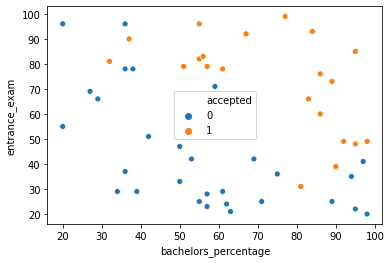

In [4]:
ax = sns.scatterplot(x="bachelors_percentage", y="entrance_exam", hue="accepted", data=df)

## Class activity

1. Will someone who scored 30 in bachelors and 60 in british entrace exam get in British College?
2. Will someone who scored 90 in bachelors and 90 in british entrace exam get in British College?

Subconsciously all of you were able to create a line that would separate the blue and orange dots (not accepted vs accepted).
Mathematically speaking, we would have to create a boundary line w1x1 + w2x2 + b = 0 (remember y = mx +c ?)

Let us just try to create the line

#jabarjasti

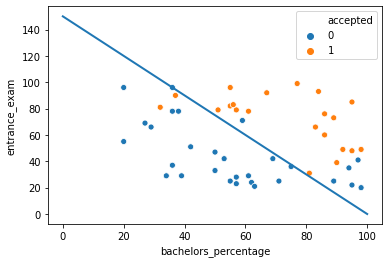

In [5]:
ax = sns.scatterplot(x="bachelors_percentage", y="entrance_exam", hue="accepted", data=df)
plt.plot([100, 0], [0, 150], linewidth=2)

y - y1 = m (x - x1)

m = (y2 - y1) / (x2 - x1)

The notations might be confusing since we replace y from grade 8-9-10 optional mathematics to x2. (Just remember that I am reminding you that there is a way, which we learnt as kids, to get equation of a line given that we have two different points.)

![title](images/1.jpg)

Why do you think we vectorized?

> The concept of hyperplane

3 variables
 
 w1x1 + w2x2 + w3x3 + b = 0
 
 boundary plane

4 variables

w1x1 + w2x2 + w3x3 + b = 0

boundary hyperplane of (n-1) dimension

> 2d - > line 1d

> 3d - > plane 2d

> 4d - > hyperplane 3d

> nd - > hyperplane (n-1)d

### Perceptron

![title](images/3.jpg)

![title](images/2.jpg)

> Do you see the similarity with Neurons in the brain?

### Perceptron algorithm

How do you make sure the computer makes the line instead of you? 

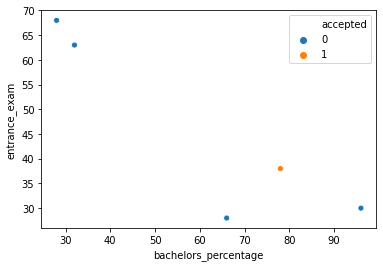

In [6]:
# Lets decrease the sample for visibility purposes

d = {'bachelors_percentage': [random.randrange(20, 100) for x in range(5)], 'entrance_exam': [random.randrange(20, 100) for x in range(5)]}
df = pd.DataFrame(data=d)
df['accepted'] = df.apply(lambda x: accepted(x['bachelors_percentage'], x['entrance_exam']), axis=1)
ax = sns.scatterplot(x="bachelors_percentage", y="entrance_exam", hue="accepted", data=df)

### Step 1:

Start with random weights and bias

> In this case we have five points, and a bias so we start there.

There will be a bunch of points that are miscalculated

### Step 2:

For a given point, if the point is already classified correctly do nothing.

### Step 3:

If a point is classified positive, but has a negative label subtract the weights and bias

### Step 4: 

If a point is classified negative, but has a positive label add the weights and bias

Let's see an example

(0.0, 150.0)

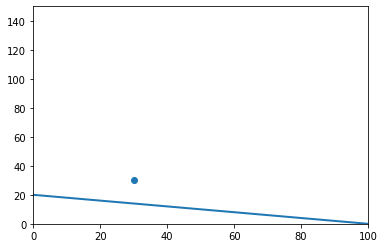

In [7]:
plt.scatter(30, 30, marker='o')
plt.plot([100, 0], [0, 20], linewidth=2)
plt.xlim(0, 100)
plt.ylim(0, 150)

Here the point is classified positive, but has a negative label, we want the line to come closer to the point. Mathematically, how do we do this?

What do we have here?
1. Coordinate of the point
2. Equation of the line

We can use the same formula we had to create an equation for the line.

y - y1 = m (x - x1)

m = (y2 - y1) / (x2 - x1)

Here we want to do this.

(0.0, 150.0)

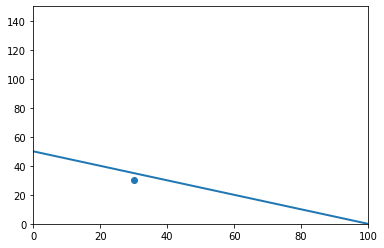

In [8]:
plt.scatter(30, 30, marker='o')
plt.plot([100, 0], [0, 50], linewidth=2)
plt.xlim(0, 100)
plt.ylim(0, 150)

#### Going to leave this as an activity for you to struggle with.

In [9]:
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

## Error Function

![title](images/4.jpg)

![title](images/5.jpg)

## TODO: Implementing the basic functions
Here is your turn to shine. Implement the following formulas, as explained in the text.
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [10]:
def sigmoid(x):
    return 1/1+np.exp(-x)
    

# Output (prediction) formula
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights)+bias)
    

# Error (log-loss) formula
def error_formula(y, output):
    return -y*np.log(output) - (1-y)*np.log(1-output)

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = -(y - output)
    weights -= learnrate * d_error * x
    bias -= learnrate * d_error
    return weights, bias

### Topics to study

1. Gradient Descent
2. Regularization
3. Overfitting/Underfitting
4. Dropout 
5. Local Minima
6. Vanising Gradient
7. Stochastic Gradient Descent
8. Learning Rate Decay
9. Momentum

In [11]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/IHZwWFHWa-w" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

C:\Users\ayush.LAPTOP-A9620OED\Anaconda\lib\site-packages\IPython\core\display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Introduction to PyTorch

https://pytorch.org/

In [12]:

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/ySvAs5ppkRw" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## Creating your own dataset


In [13]:
from icrawler.builtin import BingImageCrawler

# bing_crawler = BingImageCrawler(storage={'root_dir': 'images/bird'})
# bing_crawler.crawl(keyword='bird', max_num=10)

# bing_crawler = BingImageCrawler(storage={'root_dir': 'images/plane'})
# bing_crawler.crawl(keyword='plane', max_num=10)

# bing_crawler = BingImageCrawler(storage={'root_dir': 'images/superman'})
# bing_crawler.crawl(keyword='superman', max_num=10)

In [ ]:
# Let us try if we can find Nepali currency

bing_crawler = BingImageCrawler(storage={'root_dir': 'images/nepali50'})
bing_crawler.crawl(keyword='Rs 50 nepali', max_num=10)

bing_crawler = BingImageCrawler(storage={'root_dir': 'images/nepali100'})
bing_crawler.crawl(keyword='Rs 100 nepali', max_num=10)

You might also want to validate if the files downloaded are infact images.

In [14]:
# path = '/Users/ayush.LAPTOP-A9620OED/Desktop/birdsplanesuperman/valid/plane/'
# for filename in listdir(path):
#     try:
#         img = Image.open(path + filename)  
#         # open the image file
#         img.verify()  # verify that it is, in fact an image
#     except (IOError, SyntaxError) as e:
#         print(filename)
#         os.remove(path + filename)

We repeat the same for birds and Superman. Once all the files have been downloaded, we will restructure the folders to contain our training, testing and validating samples. I am allocating 70% for training, 20% for validating and 10% for testing

In [18]:
import torch
import torchvision
from torchvision import datasets, transforms, utils, models
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.optim import lr_scheduler

import os
from textwrap import wrap
from collections import OrderedDict
import time
import copy
from PIL import Image, ImageFile

PyTorch is an open source python package that provides Tensor computation (similar to numpy) with GPU support. This example serves as a general idea of how Transfer Learning can be used for more complicated image classification. Transfer learning, in a nutshell, is reusing a model developed for some other classification task, for your classification purposes. The dataset was created by scraping images from google image search.

Now that we have imported useful libraries, we need to augment and normalize the images. Torchvision transforms is used to augment the training data with random scaling, rotations, mirroring and cropping. We do not need to rotate or flip our testing and validating sets. The data for each set will also be loaded with Torchivision’s DataLoader and ImageFolder.

In [16]:
# Torchvision transforms used to augment the training data with random scaling, rotations, mirroring and cropping
# The training, validation and testing data appropriately cropped and normalized
# The data for each set is loaded with torchvision's DataLoader
# The data for each set (train, validation, test) is loaded with torchvision's ImageFolder
data_dir = r""


normalize = transforms.Normalize(mean = [0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomRotation(30),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize
    ]),
}

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'test', 'valid']}

dataset_sizes = {x: len(image_datasets[x]) 
                              for x in ['train', 'test', 'valid']}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=64,
                                             shuffle=True)
              for x in ['train', 'test', 'valid']}

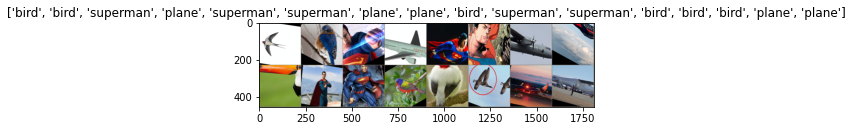

In [86]:
# Visualizing a few training images so as to understand the data augmentations

def initial_imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    # unnormalizing 
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  

(inputs, classes) = next(iter(dataloaders['train']))
# Lets only show 16 images for visibility 
(inputs, classes) = inputs[0:16], classes[0:16]
out = torchvision.utils.make_grid(inputs)
class_names = image_datasets['train'].classes
initial_imshow(out, title=([class_names[x] for x in classes]))

### Loading the Densenet (pretrained network) from torchvision.models

In [87]:
model = models.densenet201(pretrained=True)

# freezing the model parameters
for param in model.parameters():
    param.requires_grad = False

# out input_size matches the in_features of pretrained model
input_size = 1920
output_size = 3

The pre-trained model’s classifier takes 1920 features as input. We need to be consistent with that. However, the output feature for our case is 3 (bird, plane, and Superman).
Now, let’s create our classifier and replace the model’s classifier.

In [88]:
# creating the classifier ordered dictionary first
# will be using this to save the model
classifier_dict = OrderedDict([
    ('fc1', nn.Linear(input_size, 512)),
    ('relu1', nn.ReLU()),
    ('dropout1', nn.Dropout(p=0.2)),
    ('fc2', nn.Linear(512, 128)),
    ('relu2', nn.ReLU()),
    ('dropout2', nn.Dropout(p=0.2)),
    ('fc3', nn.Linear(128, output_size)),
    ('output', nn.LogSoftmax(dim=1)),
    ])
    
# creating the classifier for our usage using the ordered dictionary
classifier = nn.Sequential(classifier_dict)

# replacing the pretrained model classifier with our classifier
model.classifier = classifier

In [89]:
# defining the criterion and optimizer

# NLLLoss because our output is LogSoftmax
criterion = nn.NLLLoss()

# Adam optimizer with a learning rate
optimizer = optim.Adam(model.classifier.parameters(), lr = 0.001)

# Decay LR by a factor of 0.1 every 5 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [90]:
# Calculate the accuracy of the model
def calc_accuracy(model, data, cuda):
    accuracy_list = []
    if (cuda):
        model.cuda()
    model.eval()    
    with torch.no_grad():
        for idx, (inputs, labels) in enumerate(dataloaders[data]):
            if cuda:
                inputs, labels = inputs.cuda(), labels.cuda()
            outputs = model.forward(inputs)
            _, predicted = outputs.max(dim=1)
            print ('\nBatch no ----- ', idx+1)
            print('Predicted Class: ', predicted) 
            print('Probability: ', torch.exp(_)) 
            equals = predicted == labels.data
            print('Correctly predicted: ', equals)
            batch_accuracy = equals.float().mean().item()
            accuracy_list.append(batch_accuracy)
            print('Batch accuracy: ',batch_accuracy)
        print('\n Mean accuracy: ', np.mean(accuracy_list))

# creating a cuda boolean for availability of cuda
cuda = torch.cuda.is_available()

# calculating the accuracy of the model on test data before training
calc_accuracy(model, 'test', cuda)


Batch no -----  1
Predicted Class:  tensor([1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
        2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2,
        2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1])
Probability:  tensor([0.3489, 0.3552, 0.3458, 0.3725, 0.3618, 0.3529, 0.3537, 0.3442, 0.3560,
        0.3514, 0.3429, 0.3627, 0.3565, 0.3525, 0.3603, 0.3535, 0.3464, 0.3509,
        0.3468, 0.3561, 0.3605, 0.3535, 0.3700, 0.3456, 0.3395, 0.3585, 0.3574,
        0.3597, 0.3506, 0.3576, 0.3509, 0.3597, 0.3638, 0.3549, 0.3526, 0.3586,
        0.3676, 0.3541, 0.3554, 0.3602, 0.3565, 0.3604, 0.3576, 0.3518, 0.3606,
        0.3470, 0.3438, 0.3539, 0.3602, 0.3566, 0.3598, 0.3650, 0.3467, 0.3537,
        0.3535, 0.3539, 0.3608, 0.3525, 0.3422, 0.3587, 0.3502, 0.3759, 0.3349,
        0.3558])
Correctly predicted:  tensor([False, False, False, False,  True, False, False, False, False, False,
         True, False, False,  True,  True, False,  True

C:\Users\ayush.LAPTOP-A9620OED\Anaconda\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "



Batch no -----  2
Predicted Class:  tensor([1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1])
Probability:  tensor([0.3558, 0.3457, 0.3610, 0.3655, 0.3550, 0.3603, 0.3437, 0.3513, 0.3474,
        0.3460, 0.3456, 0.3450, 0.3530, 0.3516, 0.3625, 0.3563, 0.3546, 0.3557,
        0.3648, 0.3659, 0.3661, 0.3570, 0.3525, 0.3511, 0.3494, 0.3572, 0.3565,
        0.3536, 0.3549, 0.3546, 0.3554, 0.3542, 0.3518, 0.3490, 0.3699, 0.3677,
        0.3576, 0.3525, 0.3438, 0.3529, 0.3539, 0.3515, 0.3536, 0.3576, 0.3424,
        0.3554, 0.3499, 0.3615, 0.3532, 0.3620, 0.3501, 0.3615, 0.3461, 0.3535,
        0.3532, 0.3570, 0.3804, 0.3599, 0.3442, 0.3439, 0.3541, 0.3531, 0.3509,
        0.3614])
Correctly predicted:  tensor([False, False, False,  True, False, False, False, False, False, False,
         True,  True, False, False, False, False, False

In [92]:
# Training the model
# Validation loss and accuracy are displayed
def train_model(model, criterion, optimizer, scheduler, num_epochs, cuda):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    if (cuda):
        model.cuda()
        
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                if (cuda):
                    inputs = inputs.cuda()
                    labels = labels.cuda()

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

# training the model
trained_model = train_model(model, criterion, optimizer, exp_lr_scheduler, 10, cuda)

Epoch 0/9
----------


C:\Users\ayush.LAPTOP-A9620OED\Anaconda\lib\site-packages\torch\optim\lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train Loss: 0.8501 Acc: 0.6654
valid Loss: 0.4527 Acc: 0.8497

Epoch 1/9
----------
train Loss: 0.4565 Acc: 0.8061
valid Loss: 0.1286 Acc: 0.9793

Epoch 2/9
----------
train Loss: 0.2202 Acc: 0.9278
valid Loss: 0.0829 Acc: 0.9845

Epoch 3/9
----------
train Loss: 0.1476 Acc: 0.9582
valid Loss: 0.1004 Acc: 0.9689

Epoch 4/9
----------
train Loss: 0.1380 Acc: 0.9620
valid Loss: 0.0822 Acc: 0.9793

Epoch 5/9
----------
train Loss: 0.1109 Acc: 0.9696
valid Loss: 0.0648 Acc: 0.9845

Epoch 6/9
----------
train Loss: 0.1126 Acc: 0.9620
valid Loss: 0.0544 Acc: 0.9845

Epoch 7/9
----------
train Loss: 0.0931 Acc: 0.9734
valid Loss: 0.0529 Acc: 0.9896

Epoch 8/9
----------
train Loss: 0.0986 Acc: 0.9696
valid Loss: 0.0542 Acc: 0.9896

Epoch 9/9
----------
train Loss: 0.0690 Acc: 0.9810
valid Loss: 0.0544 Acc: 0.9896

Training complete in 22m 60s
Best val Acc: 0.989637


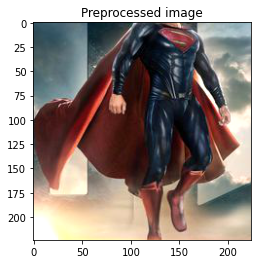

In [93]:
# Image preprocessing to convert pil image into an object tht can be used as input to a trained model
def image_preprocessing(image_path):
    im = Image.open(image_path)
    if (im.size[0] < im.size[1]):
        im.thumbnail((256, 10000), Image.ANTIALIAS)
    else:
        im.thumbnail((10000, 256), Image.ANTIALIAS)
    
    left =  (im.width-224)/2
    lower = (im.height-224)/2
    right = left+224
    upper = lower+224
    box = (left, lower, right, upper)
    im = im.crop(box)
    
    np_im = np.array(im)/225
    np_im = (np_im - np.array([0.485, 0.456, 0.406]))/np.array([0.229, 0.224, 0.225])
    np_im = np_im.transpose((2,0,1))
    return np_im        
    
    
# Function that plots preprocessed image
def imshow(image, ax=None, title=None):
    if ax is None:
        fig, ax = plt.subplots()
    if title:
        plt.title(title)
    image = image.transpose((1, 2, 0))
    
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0, 1)
    ax.imshow(image)
    return ax
    
# Testing the imshow function
imshow(image_preprocessing(os.path.join(data_dir, 'test/superman/001233.jpg')), title='Preprocessed image')


In [96]:
def original_image(image_path, ax=None, title=None):
    image = Image.open(image_path)
    if ax is None:
        fig, ax = plt.subplots()
    if title:
        plt.title(title)
    ax.imshow(image)
    return ax

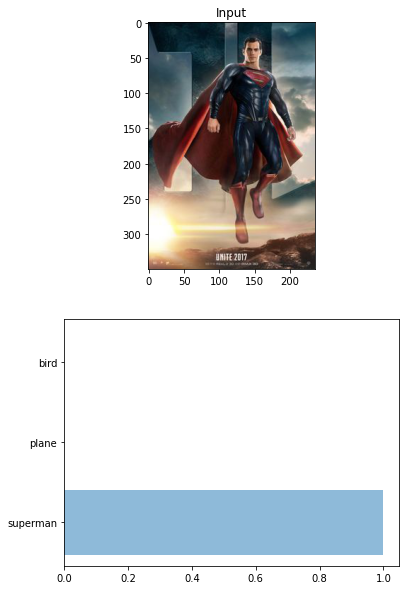

In [97]:
# Predict function for top k features
def predict(image_path, model, cuda):
    if (cuda):
        model = model.cpu()
    processed_image = image_preprocessing(image_path)
    processed_image_float = torch.from_numpy(processed_image).type(torch.FloatTensor)
    # adding batch size of 1
    processed_image_float.unsqueeze_(0)
    output = model.forward(processed_image_float)
    probability = torch.exp(output)
    probs, classes = probability.topk(3)
    probs = probs.detach().numpy().tolist()[0] 
    classes = classes.detach().numpy().tolist()[0]
    idx_to_class = {val: key for key, val in    
                        image_datasets['train'].class_to_idx.items()}
    labels = [idx_to_class[label] for label in classes]
    return probs, labels
    
 # Testing the predict function
predict(os.path.join(data_dir, 'test/superman/001233.jpg'), trained_model, cuda)

# Function that plots top k probabilities associated with input 
def plot_solution(image_path, model):
    plt.figure(figsize = (6,10))
    ax = plt.subplot(2,1,1)
    title = 'Input'
    original_image(image_path, ax=ax, title=title)
    probs, labels = predict(image_path, model, cuda) 
    plt.subplot(2,1,2)
    plt.barh(labels, probs, align='center', alpha=0.5)
    plt.show()
    
# Testing the plot_solutions function
plot_solution(os.path.join(data_dir, 'test/superman/001233.jpg'), trained_model)

In [ ]:
## Confusion Matrix

In [98]:
# Academic Activities
# Next week


# 

| **Week** | **Tentative Modules**                                | **Topics**                                                                                                                                                                                                                             |
| -------- | ---------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **1**    | **Icebreaker**<br>**7th feb**                        | **Class Activity: Set up an individual GitHub account, follow developers and create networks, create a blogging website in GitHub, and populate content including content from last semester.**                                        |
| **2**    | **Technical Job Interview Mocks**<br>**14th feb**    | **Topics Covered:**<br><br>1. Resume and CVs<br>2. Positioning<br>3. Research <br>4. Technical Interviews questions (Data structures and algorithms)<br>5. Class Activity: Conduct mock interviews and provide peer feedback           |
| **3**    | **Python and Pandas** <br>**21st feb**               | **Topics Covered:**<br><br>1. Introduction to Python Programming<br>2. Jupyter Notebooks<br>3. Conditionals, Loops, Function<br>4. Data Structures (List, Map, Set, Dictionaries) and Abstract Data Types<br>5. Introduction to Pandas |
| **4**    | **Exploratory Data Analysis**<br>**6th March**       | 1. Importing, Viewing, Grouping, Sorting Datasets<br>2. Data Visualization<br>3. Exercise on Exploratory Data Analysis                                                                                                                 |
| **5**    | **Inferential Statistics**<br>**13th March**         | **Topics Covered:**<br><br>1. Correlation and Causation<br>2. Statistical hypothesis testing<br>3. Chi-squared tests<br>4. Regression<br>5. Analysis of variance<br>6. Confidence intervals                                            |
| **6**    | **NoSql Databases**<br>**20th March**                | **Topics Covered:**<br><br>1. NOSQL Systems<br>2. Key-value database<br>3. Columnar Databases<br>4. Document databases with MongoDB<br>5. Graph Databases<br>6. How to design reliable, scalable and maintainable applications         |
| **7**    | **Tableau** <br>**27th March**                       | **Topics Covered:**<br><br>1. Good visualization vs Bad visualization<br>2. Advantages of Tableau<br>3. Introduction to Google Data Studio<br>4. Tableau exercises                                                                     |
| **8**    | **Tableau**                                          | **Topics Covered:**<br><br>5. Good visualization vs Bad visualization<br>6. Advantages of Tableau<br>7. Introduction to Google Data Studio<br>8. Tableau exercises                                                                     |
| **9**    | **ARIMA Time Series Analysis**                       | **Topics Covered:**<br><br>1. Introduction to Time Series<br>2. Time Series in Context to Nepal<br>3. Seasonality and Trend<br>4. Pandas and Date Time Range<br>5. ANOVA                                                               |
| **10**   | **ARIMA, Time Series Analysis**                      | **Topics Covered:**<br><br>6. Facebook Prophet<br>7. Class Activity                                                                                                                                                                    |
| **11**   | **Entrepreneurial skills for technology management** | **Topics Covered:**<br><br>1. MTI skills<br>2. Bootstrapping<br>3. Value Proposition<br>4. Business  model canvas<br>5. Product Market Fit<br>6. Positioning<br>7. Lean startup                                                        |
| **12**   | **Introduction to Deep Learning**                    | 1. Introduction to Deep Learning<br>2. Practical aspects of Deep Learning<br>3. Optimization algorithms<br>4. Hyperparameter tuning, Batch Normalization and Programming Frameworks                                                    |
| **13**   | Project and Office hours                             |                                                                                                                                                                                                                                        |


